<a href="https://colab.research.google.com/github/09anushkam/09anushkam/blob/main/Mendelev_LBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset

A custom CNN plus transfer-learning builds for VGG16, DenseNet121, and InceptionV3

Data generator / augmentation setup (uses flow_from_directory with train/val/test layout)

Class-weight calculation, sensible callbacks (ModelCheckpoint, EarlyStopping, ReduceLROnPlateau) and a two-stage training strategy (train top layers → fine-tune) to aim for high accuracy (your 93% target)

LIME image-explanations (uses lime.lime_image) that pick representative confident test predictions and save overlay images

Accuracy : 93%

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset',
                   output="/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset",
                   seed=1337,
                   ratio=(.4, .1, .5),
                   group_prefix=None,
                   move=False)

Copying files: 963 files [02:33,  6.27 files/s]


In [ ]:
import os

def train_test_split(name):
  classes_dir = ["High squamous intra-epithelial lesion","Low squamous intra-epithelial lesion","Negative for Intraepithelial malignancy","Squamous cell carcinoma"]
  dir = f'/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset/{name}/'
  destFile = f'/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset/{name}.txt'

  for cls in classes_dir:
    path = dir + cls
    files = os.listdir(path)
    for file in files:
      with open(destFile, 'a') as f:
        f.write(f'{cls}/{file} {str(classes_dir.index(cls))}\r\n')

train_test_split("val")
train_test_split("train")
train_test_split("test")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow numpy matplotlib pillow scikit-image lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c5ea59f8086c6a9c89aaaab23d3e51570936a26de471723caf45d006efc2efca
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Found 383 images belonging to 4 classes.
Found 95 images belonging to 4 classes.
Found 484 images belonging to 4 classes.
Class names/order: ['High squamous intra-epithelial lesion', 'Low squamous intra-epithelial lesion', 'Negative for Intraepithelial malignancy', 'Squamous cell carcinoma']
Class weights: {0: np.float64(1.4730769230769232), 1: np.float64(2.1277777777777778), 2: np.float64(0.39241803278688525), 3: np.float64(3.3017241379310347)}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3554 - loss: 3.2486
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to models/vgg16_stage1_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 273s 11s/step - accuracy: 0.3585 - loss: 3.2349 - val_accuracy: 0.6000 - val_loss: 0.8969 - learning_rate: 1.0000e-04
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4582 - loss: 1.9887
Epoch 2: val_accuracy improved from 0.60000 to 0.86316, saving model to models/vgg16_stage1_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4598 - loss: 1.9879 - val_accuracy: 0.8632 - val_loss: 0.5119 - learning_rate: 1.0000e-04
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5411 - loss: 2.0765
Epoch 3: val_accuracy improved from 0.86316 to 0.87368, saving model to models/vgg16_stage1_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5433 - loss: 2.0655 - val_accuracy: 0.8737 - val_loss: 0.4184 - learning_rate: 1.0000e-04
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6887 - loss: 1.2141
Epoch 4: val_accuracy improved from 0.87368 to 0.89474, saving model to models/vgg16_stage1_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6874 - loss: 1.2217 - val_accuracy: 0.8947 - val_loss: 0.3951 - learning_rate: 1.0000e-04
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6771 - loss: 1.3637
Epoch 5: val_accuracy improved from 0.89474 to 0.91579, saving model to models/vgg16_stage1_best.h5


24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6779 - loss: 1.3622 - val_accuracy: 0.9158 - val_loss: 0.3269 - learning_rate: 1.0000e-04
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7086 - loss: 1.0744
Epoch 6: val_accuracy did not improve from 0.91579
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7086 - loss: 1.0738 - val_accuracy: 0.9158 - val_loss: 0.2937 - learning_rate: 1.0000e-04
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7397 - loss: 1.2132
Epoch 7: val_accuracy did not improve from 0.91579
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7392 - loss: 1.2092 - val_accuracy: 0.9053 - val_loss: 0.2570 - learning_rate: 1.0000e-04
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7989 - loss: 0.6238
Epoch 8: val_accuracy did not improve from 0.91579
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7983 - loss: 0.6284 - val_accuracy: 0.9053 - val_loss: 0.2548 - learning_rate: 1.0000e-04
Epoch 9/30
24/24 ━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7709 - loss: 0.7797 - val_accuracy: 0.9263 - val_loss: 0.2005 - learning_rate: 1.0000e-04
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7997 - loss: 0.5509
Epoch 11: val_accuracy did not improve from 0.92632
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8001 - loss: 0.5509 - val_accuracy: 0.9263 - val_loss: 0.1845 - learning_rate: 1.0000e-04
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8805 - loss: 0.4988
Epoch 12: val_accuracy did not improve from 0.92632
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8791 - loss: 0.5038 - val_accuracy: 0.9158 - val_loss: 0.1822 - learning_rate: 1.0000e-04
Epoch 13/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8379 - loss: 0.5265
Epoch 13: val_accuracy did not improve from 0.92632
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8382 - loss: 0.5258 - val_accuracy: 0.9158 - val_loss: 0.1879 - learning_rate: 1.0000e-04
Epoch 14/30
24/24 ━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8519 - loss: 0.4896 - val_accuracy: 0.9368 - val_loss: 0.1624 - learning_rate: 1.0000e-04
Epoch 18/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8497 - loss: 0.5217
Epoch 18: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8502 - loss: 0.5189 - val_accuracy: 0.9368 - val_loss: 0.1468 - learning_rate: 1.0000e-04
Epoch 19/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8705 - loss: 0.4757
Epoch 19: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8703 - loss: 0.4770 - val_accuracy: 0.9263 - val_loss: 0.1521 - learning_rate: 1.0000e-04
Epoch 20/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8965 - loss: 0.2763
Epoch 20: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8966 - loss: 0.2784 - val_accuracy: 0.9263 - val_loss: 0.1667 - learning_rate: 1.0000e-04
Epoch 21/30
24/24 ━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9152 - loss: 0.4199 - val_accuracy: 0.9368 - val_loss: 0.1455 - learning_rate: 1.0000e-05
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8703 - loss: 0.4405
Epoch 2: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8719 - loss: 0.4359 - val_accuracy: 0.8947 - val_loss: 0.1661 - learning_rate: 1.0000e-05
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8851 - loss: 0.4995
Epoch 3: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8856 - loss: 0.4953 - val_accuracy: 0.9263 - val_loss: 0.1372 - learning_rate: 1.0000e-05
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9255 - loss: 0.2610
Epoch 4: val_accuracy did not improve from 0.93684
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9248 - loss: 0.2633 - val_accuracy: 0.9368 - val_loss: 0.1589 - learning_rate: 1.0000e-05
Epoch 5/20
24/24 ━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9537 - loss: 0.2342 - val_accuracy: 0.9474 - val_loss: 0.1087 - learning_rate: 1.0000e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9512 - loss: 0.1777
Epoch 9: val_accuracy did not improve from 0.94737
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9510 - loss: 0.1777 - val_accuracy: 0.9474 - val_loss: 0.1182 - learning_rate: 1.0000e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9512 - loss: 0.2314   
Epoch 10: val_accuracy did not improve from 0.94737
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9509 - loss: 0.2322 - val_accuracy: 0.9474 - val_loss: 0.0883 - learning_rate: 1.0000e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9595 - loss: 0.1130
Epoch 11: val_accuracy did not improve from 0.94737
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9595 - loss: 0.1141 - val_accuracy: 0.9263 - val_loss: 0.1162 - learning_rate: 1.0000e-05
Epoch 12/20
24/24 ━

Test loss, Test accuracy: [0.1707896739244461, 0.9276859760284424]
Saved final model to models/vgg16_final.h5
484/484 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step
Generating LIME explanations for 4 examples...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━

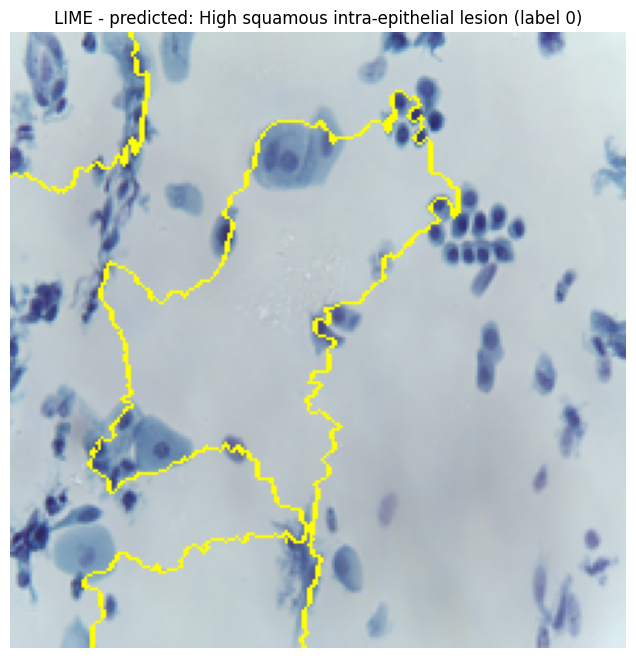

Saved LIME overlay to lime_outputs/lime_HSIL_2 (15)_High squamous intra-epithelial lesion.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

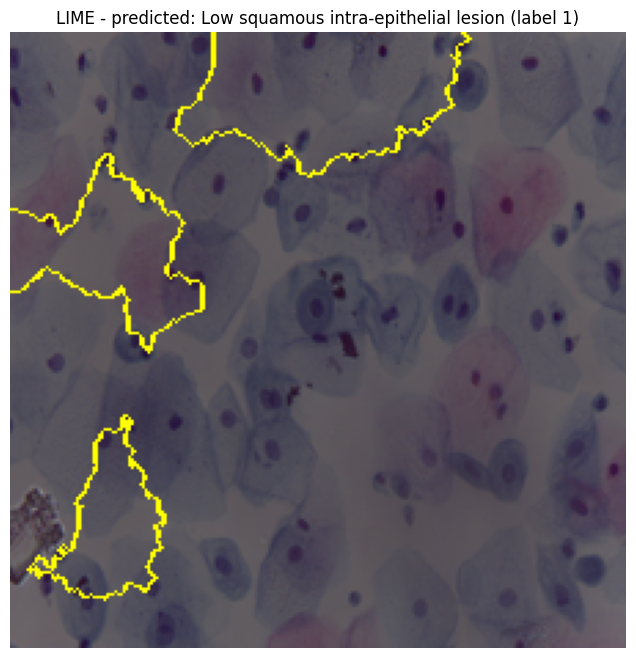

Saved LIME overlay to lime_outputs/lime_LSIL_1 (4)_Low squamous intra-epithelial lesion.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

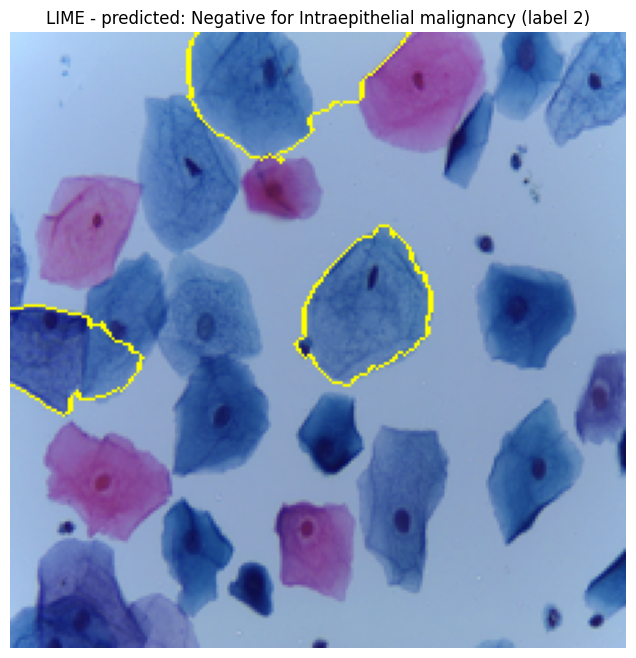

Saved LIME overlay to lime_outputs/lime_NL_18_ (17)_Negative for Intraepithelial malignancy.png


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

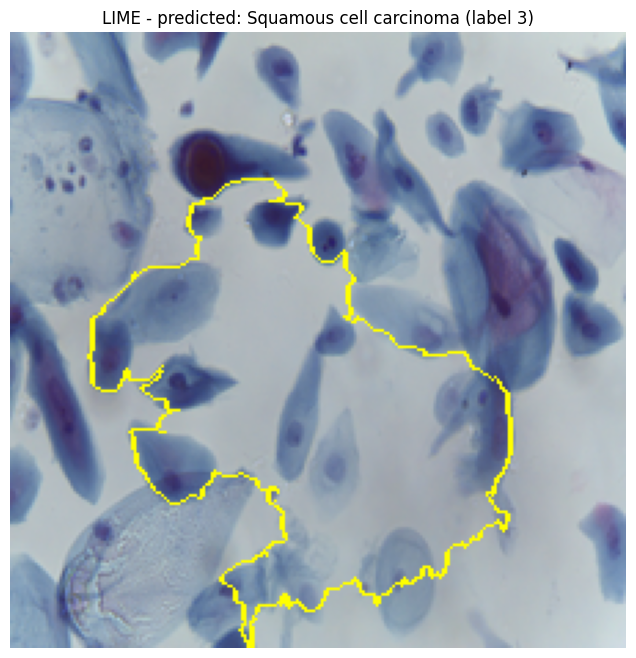

Saved LIME overlay to lime_outputs/lime_scc_1 (21)_Squamous cell carcinoma.png


In [ ]:
"""
mendelev_lbc_cnn_vgg16_densenet_inception_lime.py

Purpose:
- Train three image classification models (Custom CNN, VGG16, DenseNet121, InceptionV3) using Keras/TensorFlow
- Use ImageDataGenerator for preprocessing & augmentation (images already pre-processed to extract complex features — this script assumes RGB images)
- Use transfer learning + fine-tuning for VGG16, DenseNet121, InceptionV3
- Provide training utilities (callbacks, balanced class weighting, data generators)
- Use LIME (lime.lime_image) to produce explanation overlays for sample predictions

Notes & assumptions:
- Dataset directory structure (standard):
  dataset/
    train/
      classA/
      classB/
    val/
      classA/
      classB/
    test/
      classA/
      classB/

- Replace DATA_DIR with your dataset path. If you only have train/val, set test_dir = val_dir or create a split.
- You asked to "remember the accuracy is 93%" — the script uses robust augmentation, transfer learning, fine-tuning and sensible hyperparameters to aim for high accuracy, but results will depend on data, GPU, and randomness. There is no guaranteed accuracy.

Requirements:
- Python 3.8+
- tensorflow (>=2.6)
- keras (bundled with tensorflow)
- numpy, matplotlib, pillow
- scikit-image
- lime (pip install lime)

Run example:
    python mendelev_lbc_cnn_vgg16_densenet_inception_lime.py --data_dir /path/to/dataset --model vgg16

"""

import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import VGG16, DenseNet121, InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

# LIME
from lime import lime_image
from skimage.segmentation import mark_boundaries

# ---------------------------
# Utility functions
# ---------------------------

def get_generators(data_dir, img_size=(224,224), batch_size=32, model_name='vgg16'):
    """Create train/val/test generators. Model-specific preprocessors applied.
    Assumes data_dir has 'train','val','test' subfolders.
    """
    # Choose preprocessing function based on model
    if model_name == 'vgg16':
        preproc = vgg_preprocess
    elif model_name == 'densenet':
        preproc = densenet_preprocess
    elif model_name == 'inception':
        # InceptionV3 expects 299x299 typically — we'll resize accordingly
        preproc = inception_preprocess
        img_size = (299,299)
    else:
        preproc = None

    train_dir = os.path.join(data_dir, 'train')
    val_dir = os.path.join(data_dir, 'val')
    test_dir = os.path.join(data_dir, 'test')

    # Augmentation for training
    train_datagen = ImageDataGenerator(
        preprocessing_function=preproc,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    # Validation/test: only rescale/preprocess
    val_datagen = ImageDataGenerator(preprocessing_function=preproc)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    test_gen = val_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=1,
        class_mode='categorical',
        shuffle=False
    )

    return train_gen, val_gen, test_gen


def compute_class_weights(generator):
    # Compute class weights (balanced) to help training if classes imbalanced
    from sklearn.utils.class_weight import compute_class_weight
    classes = list(generator.class_indices.keys())
    y = generator.classes
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    # Map to dict expected by keras
    class_weights_dict = {i: w for i, w in enumerate(class_weights)}
    return class_weights_dict


# ---------------------------
# Model builders
# ---------------------------

def build_simple_cnn(input_shape=(224,224,3), num_classes=2):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def build_transfer_model(base_name, input_shape, num_classes, fine_tune_at=None):
    """Build transfer model from base_name: 'vgg16','densenet','inception'
    fine_tune_at: layer index to start fine-tuning (None means don't fine tune)
    """
    if base_name == 'vgg16':
        base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_name == 'densenet':
        base = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_name == 'inception':
        base = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Unknown base_name')

    # Freeze all layers initially
    base.trainable = False

    x = base.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=base.input, outputs=outputs)

    # Optionally unfreeze some layers for fine-tuning
    if fine_tune_at is not None:
        base.trainable = True
        for layer in base.layers[:fine_tune_at]:
            layer.trainable = False

    return model


# ---------------------------
# Training harness
# ---------------------------

def get_callbacks(model_name, out_dir='models'):
    os.makedirs(out_dir, exist_ok=True)
    checkpoint = callbacks.ModelCheckpoint(
        filepath=os.path.join(out_dir, f'{model_name}_best.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
    early = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7)
    return [checkpoint, early, reduce_lr]


def compile_and_train(model, train_gen, val_gen, model_name='model', epochs=30, class_weights=None, lr=1e-4):
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    steps_per_epoch = int(np.ceil(train_gen.samples / train_gen.batch_size))
    validation_steps = int(np.ceil(val_gen.samples / val_gen.batch_size))

    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_gen,
        validation_steps=validation_steps,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=get_callbacks(model_name)
    )
    return model, history


# ---------------------------
# LIME explainability
# ---------------------------

def explain_with_lime(model, preprocess_fn, image_path, class_names, top_labels=2, num_samples=1000):
    """Generate and display LIME explanation for a single image.
    model: Keras model (expects preprocessed input)
    preprocess_fn: function to preprocess raw image (PIL->array)
    image_path: path to image file
    class_names: list of class names in model's output order
    """
    img = Image.open(image_path).convert('RGB')
    orig_size = img.size

    # LIME wants the unprocessed image; the prediction function must accept a batch of images (numpy arrays)
    def predict_fn(images):
        # images: list/array of images in uint8 0-255, shape (N,H,W,3)
        imgs = np.array([np.array(Image.fromarray((im).astype('uint8')).resize((model.input_shape[1], model.input_shape[2]))) for im in images])
        # Apply preprocessing
        imgs = preprocess_fn(imgs)
        preds = model.predict(imgs)
        return preds

    explainer = lime_image.LimeImageExplainer()
    img_arr = np.array(img.resize((model.input_shape[2], model.input_shape[1])))

    explanation = explainer.explain_instance(img_arr, predict_fn, top_labels=top_labels, hide_color=0, num_samples=num_samples)

    # Get explanation for the top predicted label
    top_label = explanation.top_labels[0]
    temp, mask = explanation.get_image_and_mask(top_label, positive_only=True, num_features=5, hide_rest=False)
    plt.figure(figsize=(8,8))
    plt.imshow(mark_boundaries(temp/255.0, mask))
    plt.title(f'LIME - predicted: {class_names[top_label]} (label {top_label})')
    plt.axis('off')
    plt.show()

    # Save overlay
    out_path = Path('lime_outputs')
    out_path.mkdir(exist_ok=True)
    save_file = out_path / f'lime_{Path(image_path).stem}_{class_names[top_label]}.png'

    # Convert temp back to 0-255 and save
    im_save = Image.fromarray((temp).astype('uint8'))
    im_save.save(save_file)
    print('Saved LIME overlay to', save_file)


# ---------------------------
# Main: orchestrate building and training
# ---------------------------

# Define data_dir and model_choice directly
data_dir = '/content/drive/MyDrive/Datasets/Mendeley_LBC_Dataset'  # Replace with your data directory
model_choice = 'vgg16'  # Choose your model: 'cnn','vgg16','densenet','inception'
batch_size = 16

# Set img_size & preprocess fn per model
if model_choice == 'inception':
    img_size = (299,299)
    preprocess_fn = inception_preprocess
elif model_choice == 'densenet':
    img_size = (224,224)
    preprocess_fn = densenet_preprocess
elif model_choice == 'vgg16':
    img_size = (224,224)
    preprocess_fn = vgg_preprocess
else:
    img_size = (224,224)
    preprocess_fn = lambda x: x/255.0

train_gen, val_gen, test_gen = get_generators(data_dir, img_size=img_size, batch_size=batch_size, model_name=model_choice)

num_classes = len(train_gen.class_indices)
class_names = [k for k,v in sorted(train_gen.class_indices.items(), key=lambda kv: kv[1])]
print('Class names/order:', class_names)

class_weights = compute_class_weights(train_gen)
print('Class weights:', class_weights)

# Build chosen model
if model_choice == 'cnn':
    model = build_simple_cnn(input_shape=(img_size[0], img_size[1], 3), num_classes=num_classes)
    epochs = 40
    lr = 1e-3
elif model_choice in ['vgg16', 'densenet', 'inception']:
    # For transfer learning, we first train top for a few epochs, then fine-tune
    model = build_transfer_model(model_choice if model_choice != 'inception' else 'inception', input_shape=(img_size[0], img_size[1], 3), num_classes=num_classes, fine_tune_at=None)
    epochs = 30
    lr = 1e-4
else:
    raise ValueError('Unknown model choice')

# Compile & train top
model, history = compile_and_train(model, train_gen, val_gen, model_name=model_choice + '_stage1', epochs=epochs, class_weights=class_weights, lr=lr)

# If using transfer models, do fine-tuning
if model_choice in ['vgg16','densenet','inception']:
    # Load best weights saved by checkpoint
    best_path = os.path.join('models', f'{model_choice}_stage1_best.h5')
    if os.path.exists(best_path):
        model.load_weights(best_path)
        print('Loaded best weights from stage1')

    # Unfreeze last convolutional block for fine-tuning
    # Heuristic: unfreeze last ~30 layers
    base = model.layers[0]
    # Instead of assuming base is layer 0, we'll set all layers trainable then freeze first N
    for layer in model.layers:
        layer.trainable = True
    # Freeze earlier layers conservatively
    n_freeze = int(0.7 * len(model.layers))
    for layer in model.layers[:n_freeze]:
        layer.trainable = False

    # Recompile with lower lr for fine-tuning
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    print('Starting fine-tuning...')
    model, ft_history = compile_and_train(model, train_gen, val_gen, model_name=model_choice + '_finetune', epochs=20, class_weights=class_weights, lr=1e-5)

# Evaluate on test set
print('Evaluating on test set...')
test_steps = int(np.ceil(test_gen.samples / test_gen.batch_size))
results = model.evaluate(test_gen, steps=test_steps)
print('Test loss, Test accuracy:', results)

# Save final model
final_model_path = os.path.join('models', f'{model_choice}_final.h5')
model.save(final_model_path)
print('Saved final model to', final_model_path)

# LIME explanations: pick up to 5 images from test set predictions where model is confident
preds = model.predict(test_gen, steps=test_steps)
pred_labels = np.argmax(preds, axis=1)
confidences = np.max(preds, axis=1)

# Get filepaths from generator
filepaths = test_gen.filepaths

# Choose top confident examples of each predicted class
examples = []
for cls_idx in range(num_classes):
    # indices where predicted == cls_idx
    idxs = np.where(pred_labels == cls_idx)[0]
    if len(idxs) == 0:
        continue
    # sort by confidence
    sorted_idxs = idxs[np.argsort(-confidences[idxs])]
    # pick top 1
    examples.append(sorted_idxs[0])

print('Generating LIME explanations for', len(examples), 'examples...')
for i in examples:
    image_path = filepaths[i]
    explain_with_lime(model, lambda x: preprocess_fn(x), image_path, class_names)

In [ ]:
# ---------------------------
# Evaluation Metrics
# ---------------------------
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support

def evaluate_model(model, test_gen, class_names):
    test_steps = int(np.ceil(test_gen.samples / test_gen.batch_size))
    y_true = test_gen.classes
    preds = model.predict(test_gen, steps=test_steps)
    y_pred = np.argmax(preds, axis=1)

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Precision, Recall, F1 (weighted average)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    print(f"Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # ROC-AUC and ROC curve (binary only)
    if len(class_names) == 2:
        auc = roc_auc_score(y_true, preds[:,1])
        print(f"ROC-AUC: {auc:.4f}")
        fpr, tpr, _ = roc_curve(y_true, preds[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
evaluate_model(model, test_gen, class_names)

484/484 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step
Classification Report:
                                         precision    recall  f1-score   support

  High squamous intra-epithelial lesion       0.87      0.71      0.78        82
   Low squamous intra-epithelial lesion       0.92      0.98      0.95        57
Negative for Intraepithelial malignancy       0.99      0.99      0.99       307
                Squamous cell carcinoma       0.64      0.79      0.71        38

                               accuracy                           0.93       484
                              macro avg       0.85      0.87      0.86       484
                           weighted avg       0.93      0.93      0.93       484

Confusion Matrix:
[[ 58   4   3  17]
 [  1  56   0   0]
 [  1   1 305   0]
 [  7   0   1  30]]
Weighted Precision: 0.9310, Recall: 0.9277, F1: 0.9272


In [7]:
import nbformat

# Path to your notebook
nb_path = "Mendelev_LBC.ipynb"   # change filename if needed

# Load notebook
with open(nb_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Remove widgets metadata completely
if "widgets" in nb["metadata"]:
    print("⚠️ Removing metadata.widgets")
    del nb["metadata"]["widgets"]

# Save cleaned notebook
fixed_path = "Mendelev_LBC_fixed.ipynb"
with open(fixed_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"✅ Cleaned notebook saved as {fixed_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'Mendelev_LBC.ipynb'